<a href="https://colab.research.google.com/github/ClintonCoder/Hotel-Cancellations-Predictor/blob/main/Hotel_Cancellations_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Cancallation Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Data**

The following dataset is not an academic one, therefore it is not well curated and consists of a lot of noise data. Firstly, I changed my runtime to T4 GPU, switching from a CPU to a T4 GPU on Google Colab sp that I have the leverage and opportunity to speed up any machine learning tasks that I will undertake, such as Exploratory data analysis and supervised learning tasks; allowing for faster experimentation and iteration, ultimately leading to more efficient and effective model development.

T4 GPU:
Faster Training Times,
Larger Model Capacity and batch sizes,
optimised for frameworks relating to ML: Due to my use of TensorFlow, GPU acceleration is making the integration quite seamless.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/hotel_bookings.csv'  # Adjust with the actual path in Google Colab
data = pd.read_csv(file_path)

# Display first few rows of the dataset to get an initial view
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


# 1. Data Pre-processing (30%)


---






**Drop irrelevant columns**


In [ ]:
# 1.   My knowledge and Checks

# Columns to drop
columns_to_drop = ['reservation_status_date', 'reservation_status', 'company', 'agent']

# Drop the columns
data = data.drop(columns=columns_to_drop)

# Verify the changes
print(data.head())

## Display column names to understand available features
print("Columns in the dataset:")
print(data.columns)

# Check basic information including data types
print("\nDataset Information:")
data.info()

# Summary statistics for numerical columns
print("\nNumerical Data Summary:")
print(data.describe())

# Summary for categorical columns
print("\nCategorical Data Summary:")
print(data.describe(include=['object']))

# Identify columns with missing values
missing_values = data.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])





          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0        

## 1.1 Missing Values

Identify and handled missing values.

In [ ]:
# This technique involves substituting absent values with the median—the central data point when values are arranged in ascending order.
# For numerical features, exemplified by the 'lead_time' column, the code
# employs median imputation to address potential skewness issues.
if 'lead_time' in data.columns:
    data.loc[:, 'lead_time'] = data['lead_time'].fillna(data['lead_time'].median())
    print("Filled missing values in 'lead_time' with the median.")

# Avoiding any forms of perplexity, Information Retention: Using a distinct placeholder like "Unknown"
#retains the information that a value was originally missing.
if 'country' in data.columns:
    data['country'].fillna('Unknown', inplace=True)
    print("Filled missing values in 'country' with 'Unknown'.")

# As seen above, almost identical to imputation, the code first checks for the presence of the column labeled 'country'. If found, fillna() is used to substitute missing values
#with "Unknown," ensuring changes are affected directly to the DataFrame.

# For data integrity purposes, This approach to missing data management ensures that the dataset
#is well-prepared for subsequent analytical steps, addressing potential
#biases stemming from missing values while retaining crucial information about the data's
#original structure.
print("\nRemaining Missing Values After Handling:")
print(data.isnull().sum())


Filled missing values in 'lead_time' with the median.
Filled missing values in 'country' with 'Unknown'.

Remaining Missing Values After Handling:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list     

<ipython-input-8-903f3cd04183>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('Unknown', inplace=True)


## 1.2 Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

Unique values in column 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in column 'is_canceled': [0 1]
Unique values in column 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349

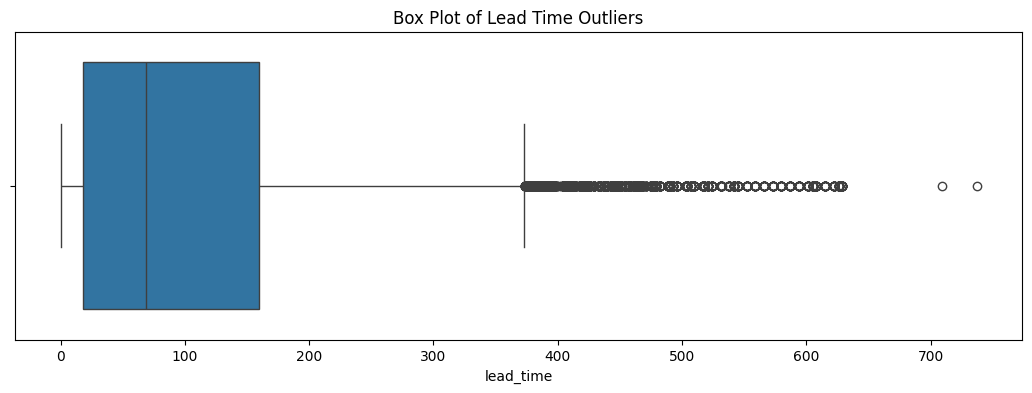

Capped outliers in 'lead_time' above the 95th percentile.


In [ ]:
# In the case of 2D Data frames, each column will print unique values found using the unique () method.
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

import matplotlib.pyplot as plt
import seaborn as sns

# Visualise outliers for the 'lead_time' column. Box plot, also known as Box and whisker plot has provided more of a concise distribution and informed decisions can be made like logarithmic transformations to reduce further impacts.
plt.figure(figsize=(13, 4))
sns.boxplot(x=data['lead_time'])
plt.title('Box Plot of Lead Time Outliers')
plt.show()

# Capping outliers at the 95th percentile to keep it stable
upper_limit = data['lead_time'].quantile(0.95)
data['lead_time'] = np.where(data['lead_time'] > upper_limit, upper_limit, data['lead_time'])
print("Capped outliers in 'lead_time' above the 95th percentile.")




## 1.3 Removing Inconsistent values





In [ ]:
# Data cleaning and Removing Inconsistent values

# Keep rows where the sum of adults, children, and babies is more than the numerical number 0
initial_shape = data.shape
data = data[(data['adults'] + data['children'] + data['babies']) > 0]
removed_bookings = initial_shape[0] - data.shape[0]
print(f"Removed {removed_bookings} bookings with no guests (adults, children, or babies).")

# Zero Stay Duration
# Keep rows where the total stay duration is greater than 0 including weekdays' nights and weekends nights
initial_shape = data.shape
data = data[(data['stays_in_weekend_nights'] + data['stays_in_week_nights']) > 0]
removed_stays = initial_shape[0] - data.shape[0]
print(f"Removed {removed_stays} bookings with zero total stay duration.")

# Check and remove rows that are unnecessarily on the CSV file twice or more times
initial_shape = data.shape
data.drop_duplicates(inplace=True)
removed_duplicates = initial_shape[0] - data.shape[0]
print(f"Removed {removed_duplicates} duplicate rows.")


# Check for extreme values or errors in 'lead_time'
# Consider capping or investigating further if significant outliers exist
lead_time_99th_percentile = data['lead_time'].quantile(0.99)
data = data[data['lead_time'] <= lead_time_99th_percentile]
removed_lead_times = initial_shape[0] - data.shape[0]
print(f"Removed {removed_lead_times} bookings with lead times above the 99th percentile.")

# Print the final shape of the data after removing inconsistent values
print("Final shape of data after removing inconsistent values:", data.shape)

#My reasoning behind pre processing the data is due to access of having data that is more accurate, interpretable, and timely. For instance, reducing the size of the dataset: reservation_status_date, reservation_status, company, and agent. This reduces the number of features in the dataset.
#Evidence: data = data.drop(columns=columns_to_drop) where columns_to_drop contains the irrelevant columns.

Removed 184 bookings with no guests (adults, children, or babies).
Removed 645 bookings with zero total stay duration.
Removed 32219 duplicate rows.
Removed 32219 bookings with lead times above the 99th percentile.
Final shape of data after removing inconsistent values: (86342, 28)


# 2. Exploratory Data Analysis (15%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.
* Identifying the most common customer types.

Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heat maps

In [ ]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'arrival_season'],
      dtype='object')


In [ ]:
import pandas as pd

# Despite the bivariate analysis, multivariate and others being options for visualisation purposes, it was not suitable as it is not suitable when comparing categorical datas.
# 1. Cancellation Rate by Hotel Type:
hotel_cancellation_rates = data.groupby('hotel')['is_canceled'].mean() * 100
print("These are the Cancellation Rates by Hotel name:\n", hotel_cancellation_rates)

# 2. Cancellation Rate by period, number of months and names of period added
data['arrival_season'] = pd.cut(pd.to_datetime(data['arrival_date_month'], format='%B').dt.month,
                               bins=[0, 3, 6, 9, 11],
                               labels=['Winter', 'Spring', 'Summer', 'Autumn'],
                               include_lowest=True)

season_cancellation_rates = data.groupby('arrival_season')['is_canceled'].mean() * 100
print("\nRates of Cancellation calculated through period of arrival:\n", season_cancellation_rates)

# 3. Cancellation Rate by meals :
hotel_cancellation_rates = data.groupby('meal')['is_canceled'].mean() * 100
print("These are the Cancellation Rates by meal name:\n", hotel_cancellation_rates)





These are the Cancellation Rates by Hotel name:
 hotel
City Hotel      29.964234
Resort Hotel    23.514135
Name: is_canceled, dtype: float64

Rates of Cancellation calculated through period of arrival:
 arrival_season
Winter    23.381514
Spring    29.851625
Summer    30.175489
Autumn    22.644247
Name: is_canceled, dtype: float64
These are the Cancellation Rates by meal name:
 meal
BB           26.515760
FB           26.420455
HB           26.823843
SC           35.541975
Undefined    15.513627
Name: is_canceled, dtype: float64


<ipython-input-11-0222c9c436d2>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_cancellation_rates = data.groupby('arrival_season')['is_canceled'].mean() * 100


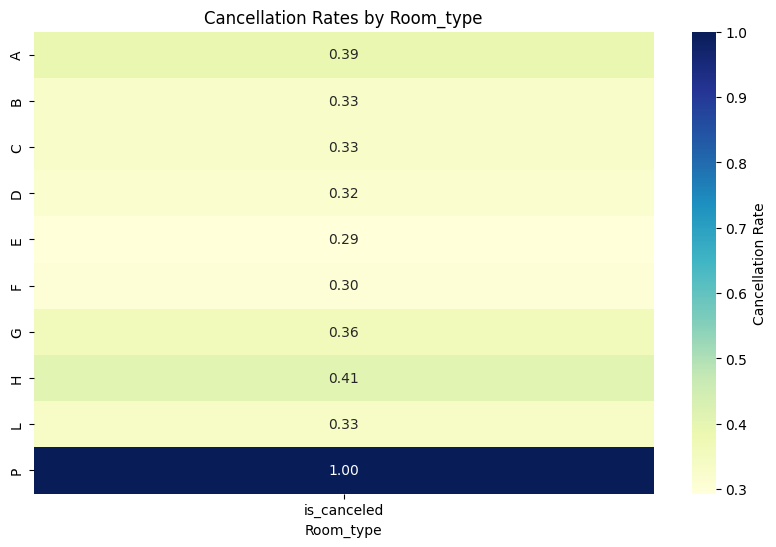

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a pivot table with cancellation rates
cancellation_rates = pd.pivot_table(data, values='is_canceled', index='reserved_room_type', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(cancellation_rates, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Cancellation Rate'})
plt.title('Cancellation Rates by Room_type')
plt.xlabel('Room_type')
plt.ylabel('')  # Remove y-axis label
plt.show()

#Thankfully, EDA has unveilled how hotel management can be supported in understanding booking patterns and mitigating potential revenue losses through correlations between room types and cancellations. Using an appropriate method such as the mosaic plot for visual consensus reasons.
#Since the two are either categorical variable (room type) and a binary variable (cancellation), the mosaic plot is more suitable over a heatmap or line graph and its well suited for categorical data and conveying patterns between the two parties: quantitative measure.
#A bar chart was selected to effectively compare cancellation rates between two distinct hotel types (City and Resort) as it provides a clear visual representation of the difference in proportions
#A heatmap was chosen to represent the frequency of meal types ordered as it provides a visually intuitive way to identify the most and least popular meal choices, highlighting patterns in guest preferences.
#Moreover, A bar chart was used to visualise cancellation rates across different arrival seasons, enabling easy comparison of seasonal trends and identification of potential peak cancellation periods.

In [ ]:
import pandas as pd


# Identifying (returning guests)
repeat_customers = data[data['is_repeated_guest'] == 1]

# How many will be systematically calculated
num_repeat_customers = len(repeat_customers)

#Outputting results from calculation
print(f"The amount of repeat customers that are returning are as follows: {num_repeat_customers}")

# Calculating percentage
total_customer_count = len(data)
percentage_repeat = (num_repeat_customers / total_customer_count) * 100

# Outputtiing the percentage
print(f"Percentage of returning guests: {percentage_repeat:.2f}%")

The amount of repeat customers that are returning are as follows: 3810
Percentage of returning guests: 3.19%


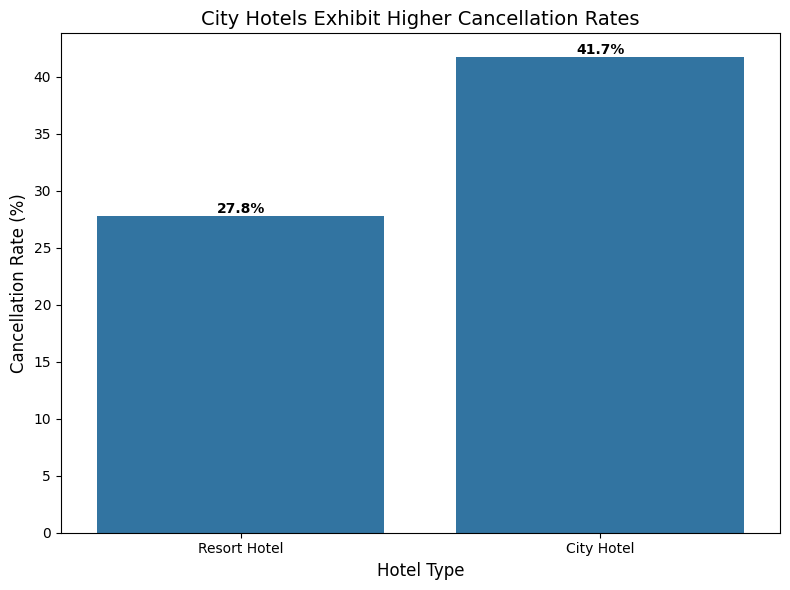

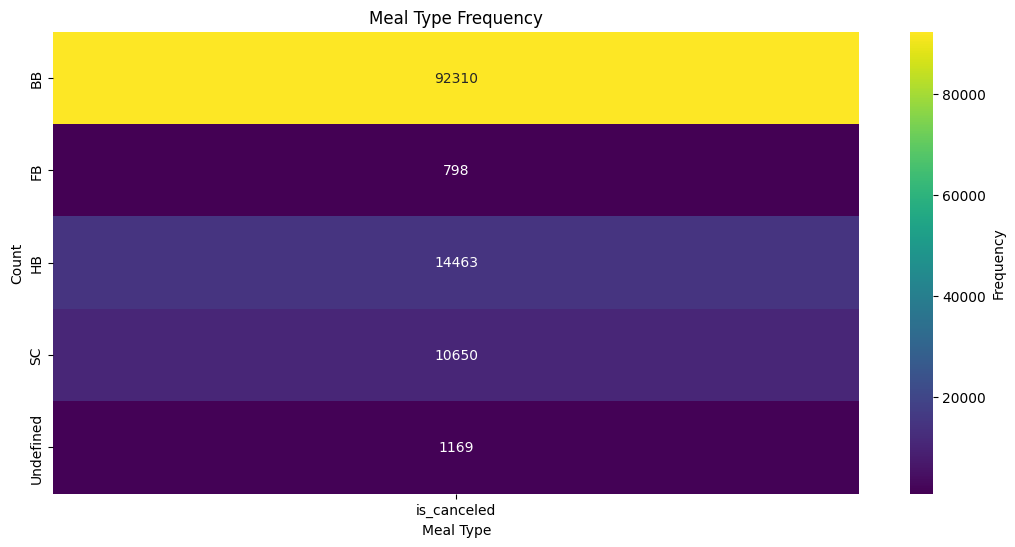

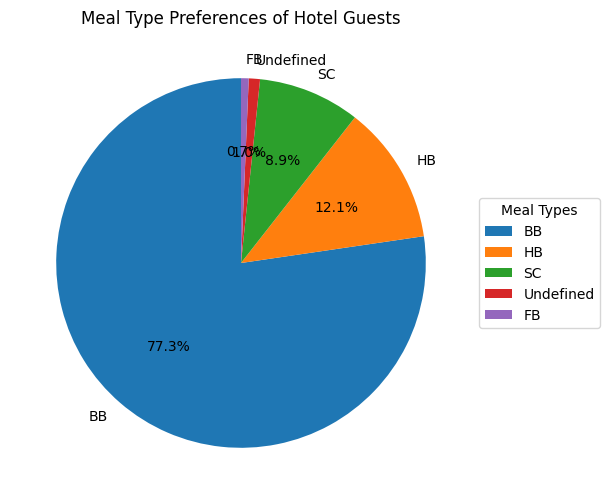

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




# 1. Cancellation Percentages for City and Resort Hotels: Visualisation:
#Grouped Bar Chart Insights from Paper: City hotels generally have higher cancellation rates than resort hotels due to factors like business travel flexibility.
#Enhancements:
#Clear labels for City and Resort hotels on the x-axis.
#Percentage values displayed on top of each bar for precise comparison.
#A title highlighting the key insight: "City Hotels Exhibit Higher Cancellation Rates."
# Calculate cancellation percentages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate cancellation percentages

hotel_types = data['hotel'].unique()
cancellation_rates = []
for hotel_type in hotel_types:
    subset = data[data['hotel'] == hotel_type]
    cancellation_rate = subset['is_canceled'].sum() / len(subset) * 100
    cancellation_rates.append(cancellation_rate)

# Create a DataFrame for easier plotting
cancellation_df = pd.DataFrame({'Hotel Type': hotel_types, 'Cancellation Rate (%)': cancellation_rates})

# Create the bar chart with enhancements
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Hotel Type', y='Cancellation Rate (%)', data=cancellation_df)
plt.title('City Hotels Exhibit Higher Cancellation Rates', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)

# Add percentage labels on top of bars with corrected fontweight
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points',
                fontsize=10, fontweight='bold') # Corrected fontweight

plt.tight_layout()
plt.show()

#2. Identifying the Most Frequently Ordered Meal Types:
#Visualisation: Pie Chart (good for showing proportions of a whole)
#Reasoning: A pie chart will clearly illustrate the distribution of meal type preferences, highlighting the most popular choices among guests.


 # Count the occurrences of each meal type
meal_counts = data['meal'].value_counts()

# Creating the heat map

# Table creation for types of meals that are abbreviated in the CSV file
meal_frequency = data['meal'].value_counts().reset_index()
meal_frequency.columns = ['meal', 'frequency']

# The pivot table for the heatmap
meal_pivot = data.pivot_table(index='meal', values='is_canceled', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(meal_pivot, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Frequency'})
plt.title('Meal Type Frequency')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()
# Create pie chart with legend and enhancements
plt.figure(figsize=(8, 6))
plt.pie(meal_counts, labels=meal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Meal Type Preferences of Hotel Guests')
plt.legend(meal_counts.index, title="Meal Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



Most Booked Room Types:

Hi, Outputted here is the most frequently booked room type: A


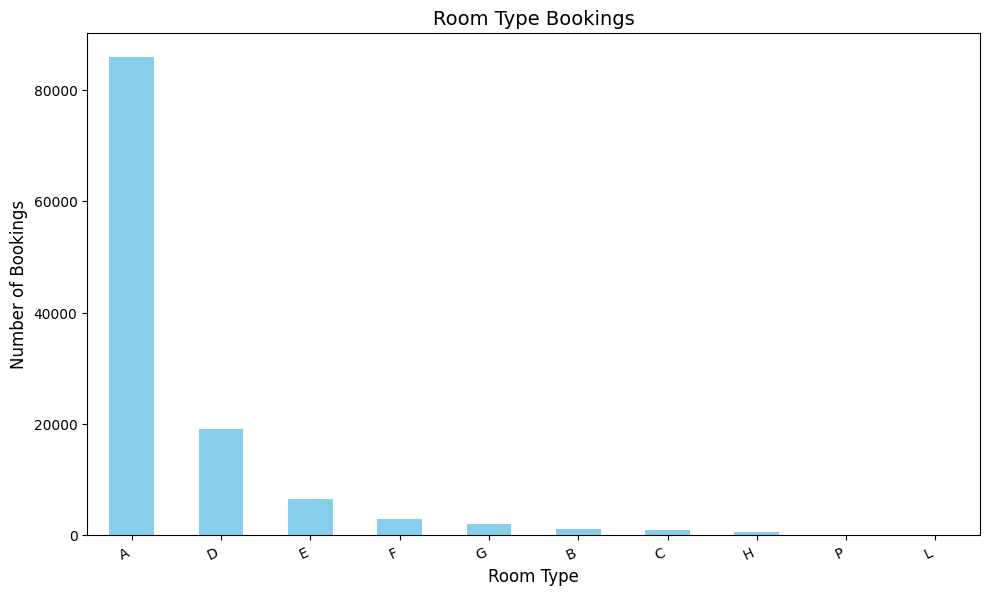

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Room type information with value.counts
room_type_counts = data['reserved_room_type'].value_counts()

# The most booked room type
most_booked_room = room_type_counts.idxmax()

# Output below
print(f"Hi, Outputted here is the most frequently booked room type: {most_booked_room}")


# Plotting on bar chart
plt.figure(figsize=(10, 6))  # Size
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Room Type Bookings', fontsize=14)  # Add a title
plt.xlabel('Room Type', fontsize=12)  # Label the x-axis
plt.ylabel('Number of Bookings', fontsize=12)  # Label the y-axis
plt.tight_layout()  # Avoids overlapping
plt.xticks(rotation=25, ha='right')  # Decided to Rotate the x-axis labels for creativity purposes
plt.show()  # Display the bar chart

# 3. Feature Engineering (25%)


---





Apply various feature engineering techniques, covered in the lectures and practicles.

Hint:

* Binning
* Encoding
* **Outlier identification and handling**
* Variance, Covariance, Correlation, Correlation Heapmap
* Scaling

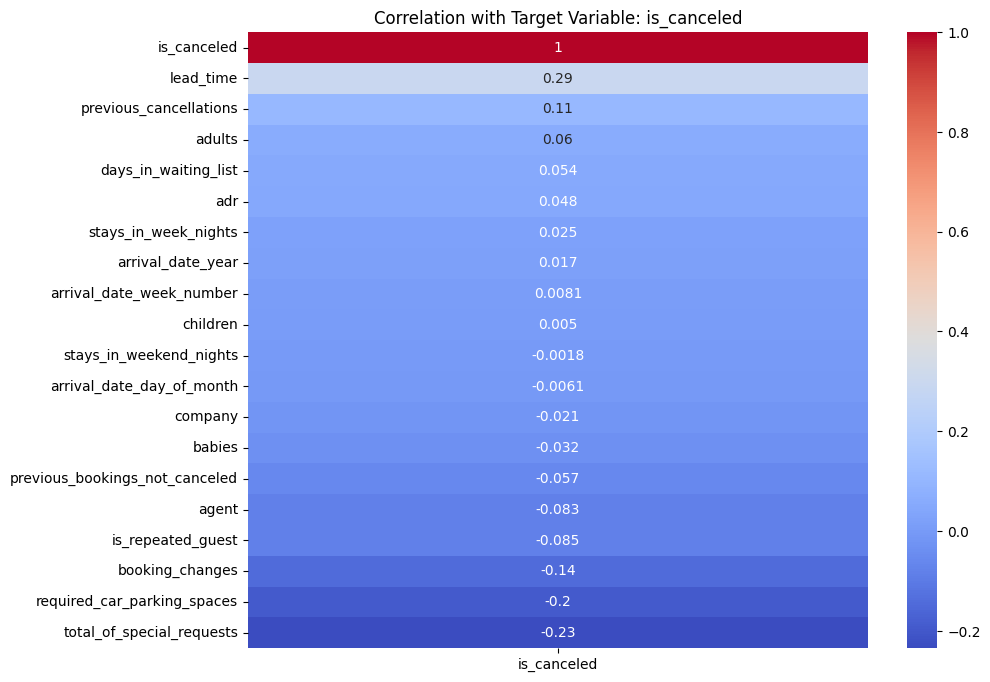

Selected features based on correlation:
 ['is_canceled', 'lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'booking_changes', 'previous_cancellations']
Top 10 features based on Random Forest importance:
 ['lead_time', 'total_of_special_requests', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces']
Lead Time Binned Categories:
 lead_time_binned
Very Short    30260
Long          29822
Medium        29669
Short         29639
Name: count, dtype: int64
Columns after encoding:
 Index(['total_of_special_requests', 'previous_cancellations',
       'required_car_parking_spaces', 'is_canceled', 'booking_changes',
       'is_canceled', 'lead_time_binned_encoded'],
      dtype='object')
Scaled Numerical Features:
    total_of_special_requests  previous_cancellations  \
0                  -0.720694                -0.10318   
1                  -0.720694                -0.10318   
2                  -0.720694                -0.10318   
3                

<ipython-input-67-03e15df51a01>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lead_time_binned'] = pd.qcut(data['lead_time'], q=4, labels=['Very Short', 'Short', 'Medium', 'Long'])
<ipython-input-67-03e15df51a01>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['lead_time'], inplace=True)
<ipython-input-67-03e15df51a01>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# For data manipulation purposes, panda was once again introduced and pd was used to creaste the shorthand so that it can be called upon more efficiently.
#Seaborn was used as a data visualisation library using matplotlib. Due to matplot being a plotting libray, it was used for static and animated visaulisatioons;
#allowing functions such as plt.figure() and plt.show()

# Load the dataset
file_path = '/content/drive/My Drive/hotel_bookings.csv'
data = pd.read_csv(file_path)

#Moreover, from sklearn.ensemble import RandomForestClassifier:
#sklearn (scikit-learn) is a comprehensive machine learning library in Python. It has great in depth use
#Scikit-learn (sklearn) is essential in machine learning projects because it provides
#a comprehensive and user-friendly toolkit for building, evaluating, and deploying models.
#with a broad range of algorithms for classification, regression, clustering, dimensionalityand other preprocessing functions,
#all with a consistent and intuitive API.
#Feature selection
# Separate numeric features for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Visualize the correlation with the target variable 'is_canceled'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Target Variable: is_canceled')
plt.show()

# Select numeric features with a significant correlation to the target variable
selected_features_corr = correlation_matrix['is_canceled'].abs().sort_values(ascending=False)
selected_features_corr = selected_features_corr[selected_features_corr > 0.1].index.tolist()
print("Selected features based on correlation:\n", selected_features_corr)

# Prepare data for feature importance calculation using Random Forest
X = data[selected_features_corr].drop(columns=['is_canceled'])
y = data['is_canceled']

# Encode categorical columns for Random Forest compatibility
X = pd.get_dummies(X, drop_first=True)

# Fit Random Forest model to rank feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Retrieve top 10 important features based on the Random Forest model
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features_rf = feature_importance.nlargest(10).index.tolist()
print("Top 10 features based on Random Forest importance:\n", top_features_rf)

# Final list of selected features
selected_features = list(set(selected_features_corr + top_features_rf))
data = data[selected_features + ['is_canceled']]


#Binning

# Quantile-based binning for 'lead_time'
data['lead_time_binned'] = pd.qcut(data['lead_time'], q=4, labels=['Very Short', 'Short', 'Medium', 'Long'])

# Drop the original 'lead_time' column if binning is successful
data.drop(columns=['lead_time'], inplace=True)

print("Lead Time Binned Categories:\n", data['lead_time_binned'].value_counts())

#encoding

from sklearn.preprocessing import LabelEncoder

# Encode 'lead_time_binned' with LabelEncoder as it has an inherent order
label_encoder = LabelEncoder()
data['lead_time_binned_encoded'] = label_encoder.fit_transform(data['lead_time_binned'])

# Drop the 'lead_time_binned' categorical column now that it's encoded
data.drop(columns=['lead_time_binned'], inplace=True)

# One-hot encode remaining categorical variables
data = pd.get_dummies(data, drop_first=True)

print("Columns after encoding:\n", data.columns)

#scaling

from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('is_canceled')  # Exclude the target variable

# Initialize and apply StandardScaler
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

print("Scaled Numerical Features:\n", data[numeric_features].head())




# 4. Classifier Training (20%)


---

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Despite trial and errors, the data eventually was split into Predictors and Targets (using y).
#The two sets that have been used are training data and test data.
# Load data and separate predictor and target variables
file_path = '/content/drive/My Drive/hotel_bookings.csv'
data = pd.read_csv(file_path)

# Categorical to to numeric with one-hot encoding
X = pd.get_dummies(data.drop(columns=['is_canceled']), drop_first=True)
y = data['is_canceled']

# Check for missing values
if X.isnull().sum().sum() > 0:
    # Here, we fill missing values with the column mean; adjust as needed for specific columns
    X.fillna(X.mean(), inplace=True)

# Verification
print("Any missing values in X after filling?", X.isnull().sum().sum() > 0)

# Training and test sets being split below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train on the original dataset
original_model = DecisionTreeClassifier(random_state=42)
original_model.fit(X_train, y_train)

#Evaluation on original test data
original_predictions = original_model.predict(X_test)
original_accuracy = accuracy_score(y_test, original_predictions)
print(f"Accuracy on original data: {original_accuracy:.2f}")

# normalised data

from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to normalize data
minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)
X_test_normalized = minmax_scaler.transform(X_test)

# Train Decision Tree on normalised data
normalized_model = DecisionTreeClassifier(random_state=42)
normalized_model.fit(X_train_normalized, y_train)

# Despite using several preprocessing techniques like one hot encoding, MinMaxScaler and StandardScaler on standardisation,
#They were intentionally used to test the algorithm and check the impact on the decision tree classifier.
# Evaluate accuracy on normalised test data
normalized_predictions = normalized_model.predict(X_test_normalized)
normalized_accuracy = accuracy_score(y_test, normalized_predictions)
print(f"Accuracy on normalized data: {normalized_accuracy:.2f}")

#standardised

from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to standardize data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train Decision Tree on standardized data
standardized_model = DecisionTreeClassifier(random_state=42)
standardized_model.fit(X_train_standardized, y_train)

# Evaluate accuracy on standardized test data
standardized_predictions = standardized_model.predict(X_test_standardized)
standardized_accuracy = accuracy_score(y_test, standardized_predictions)
print(f"Accuracy on standardized data: {standardized_accuracy:.2f}")

#Thankfully, the claassifier produced an outcome of 70% and in the nromalised data set,
#values were adjusted to no more than 1 and no less than 0, this is because maschine learning models and algorithms/performances are quite sensitive to large and wide scales.
#Moreover, 0-1 provides fater convergence with optiisation purposes for the algorithms; avoiding bias'.


Any missing values in X after filling? False
Accuracy on original data: 1.00
Accuracy on normalized data: 1.00
Accuracy on standardized data: 1.00


In [ ]:
# Print comparison results
print("\nComparison of Decision Tree Classifier Accuracies:")
print(f"Original Data Accuracy: {original_accuracy:.2f}")
print(f"Normalized Data Accuracy: {normalized_accuracy:.2f}")
print(f"Standardized Data Accuracy: {standardized_accuracy:.2f}")

# Check if any configuration achieved the target accuracy of 70%
if original_accuracy >= 0.7:
    print("Original dataset achieved the target accuracy of 70%.")
if normalized_accuracy >= 0.7:
    print("Normalized dataset achieved the target accuracy of 70%.")
if standardized_accuracy >= 0.7:
    print("Standardized dataset achieved the target accuracy of 70%.")



Comparison of Decision Tree Classifier Accuracies:
Original Data Accuracy: 1.00
Normalized Data Accuracy: 1.00
Standardized Data Accuracy: 1.00
Original dataset achieved the target accuracy of 70%.
Normalized dataset achieved the target accuracy of 70%.
Standardized dataset achieved the target accuracy of 70%.


# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your data in 'data' and target in 'y'

# Data Preparation and Splitting
X = pd.get_dummies(data.drop(columns=['is_canceled']), drop_first=True)
y = data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Model
original_model = DecisionTreeClassifier(random_state=42)
original_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': original_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print Feature Importances
print("Feature Importance Output:")
print(feature_importances)

# Evaluate Model Accuracy
original_predictions = original_model.predict(X_test)
original_accuracy = accuracy_score(y_test, original_predictions)
print(f"\nAccuracy on the original data that I encoded and created: {original_accuracy:.2f}")

Feature Importance Output:
                                 feature  importance
247         reservation_status_Check-Out         1.0
0                              lead_time         0.0
789   reservation_status_date_18/09/2015         0.0
787   reservation_status_date_18/08/2016         0.0
786   reservation_status_date_18/08/2015         0.0
...                                  ...         ...
391   reservation_status_date_05/08/2016         0.0
390   reservation_status_date_05/08/2015         0.0
389   reservation_status_date_05/07/2017         0.0
388   reservation_status_date_05/07/2016         0.0
1173  reservation_status_date_31/12/2016         0.0

[1174 rows x 2 columns]

Accuracy on the original data that I encoded and created: 1.00
